<a href="https://colab.research.google.com/github/handelenriquezacuna/IntroDataScience/blob/main/ProyectoIntroduccionCienciadeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Ciencia de Datos
*Universidad Fidelitas*

**Introduccion a la Ciencia de Datos**
##estrategia de optimización del rendimiento de procesos empresariales mediante análisis de tiempos de ejecución
###Autores
- Manuel Cartin Hernandez
- Grettel Chinchilla Araya
- Darío José Castillo Castro
- Haendel Enríquez Acuña




# Comprension de Estructura de Datos

Construcción de la Clase DataAnalyzer tiene como propósito cargar y explorar la estructura de un conjunto de datos, permitiendo la identificación de sus características clave antes de su procesamiento.


# Principales Funcionalidades
La clase **DataAnalyzer** permite obtener detalles estructurales del conjunto de datos, incluyendo:

1. Lugar de carga de la información: Permite manejar distintas fuentes de datos y validar que se han cargado correctamente en memoria.
2. Tipos y valores de cada columna: Identifica el tipo de datos y la cantidad de valores únicos en cada columna.
3. Ejemplo de cada valor por columna: Muestra un valor representativo por cada variable, extrayendo el primer dato disponible.
4. Valores en blanco encontrados: Cuenta la cantidad de valores nulos o faltantes en cada columna.
5. Datos únicos por columna: Identifica la cardinalidad de los datos en cada variable.

Con estas funcionalidades, la clase facilita la exploración y validación del dataset antes de aplicar transformaciones o modelos de análisis avanzados.

In [ ]:
import pandas as pd

class DataLoader:
  # Cargar datos en memoria
  def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

  def load_data(self):
        try:
            self.data = pd.read_csv(self.file_path)
            print(f"Data loaded from {self.file_path}")
        except Exception as e:
            print(f"Error loading data: {e}")
            self.data = None

  def get_data(self):
        return self.data

  def describe_columns(self):
        """
        Devuelve un resumen de la estructura del DataFrame:
        - Nombre de la columna
        - Tipo de datos
        - Valores nulos
        - Valores únicos
        - Ejemplo de valores

        Retorna:
        - pd.DataFrame con el esquema del dataset.
        """
        if self.data is not None:
            schema = pd.DataFrame({
                "Column Name": self.data.columns,
                "Data Type": [self.data[col].dtype for col in self.data.columns],
                "Missing Values": [self.data[col].isna().sum() for col in self.data.columns],
                "Unique Values": [self.data[col].nunique() for col in self.data.columns],
                "Example Value": [
                    f"{col}: {self.data[col].dropna().iloc[0]}" if not self.data[col].dropna().empty else f"{col}: None"
                    for col in self.data.columns
                ]
            })

            return schema
        else:
            return "No data loaded"

if __name__ == "__main__":
  # Example usage:
  main  = DataLoader("sample_data/optimized_processes_dataset_trans.csv")
  main.load_data()
  df = main.get_data()
  columnDescribe  = main.describe_columns()
  print(columnDescribe)


Data loaded from sample_data/optimized_processes_dataset_trans.csv
           Column Name Data Type  Missing Values  Unique Values  \
0              TrackId    object               0          30000   
1         CreationDate    object               0            181   
2            StartDate    object               0            181   
3              EndDate    object               0          28359   
4               UserId     int64               0            100   
5             ModuleId    object               0             10   
6            ProductId    object               0              9   
7             UserName    object               0            100   
8       UserClientName    object               0             20   
9             WaitTime     int64               0            100   
10       ExecutionTime     int64               0            100   
11         ProcessType    object               0              3   
12       PriorityLevel     int64               0              

# Resumen estadístico

La media del los TiempoDeEspera es: 3031.948
La mediana del los TiempoDeEspera es: 3060.0
El minimo valor de los TiempoDeEspera es: 60
El maximo valor de los TiempoDeEspera es: 6000
La moda del los TiempoDeEspera es: 840
La varianza del los TiempoDeEspera es: 3008940.765296
La desviacion estandar del los TiempoDeEspera es: 1734.6298640620714
La media de los tiempos de ejecución es: 3038.59
La mediana de los tiempos de ejecución es: 3060.0
El mínimo valor de los tiempos de ejecución es: 60
El máximo valor de los tiempos de ejecución es: 6000
La moda de los tiempos de ejecución es: 5040
La varianza de los tiempos de ejecución es: 2968063.331900097
La desviación estándar de los tiempos de ejecución es: 1722.80681792826
La media de los niveles de prioridad es: 2.001133333333333
La mediana de los niveles de prioridad es: 2.0
El mínimo valor de los niveles de prioridad es: 1
El máximo valor de los niveles de prioridad es: 3
La moda de los niveles de prioridad es: 3
La media de los recursos d

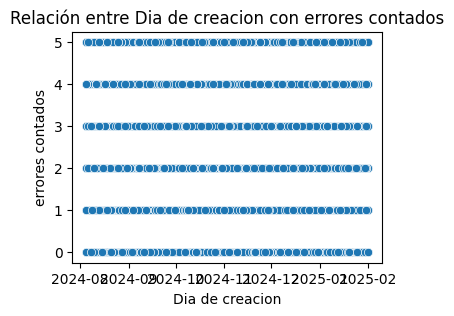

Probabilidad de que el tiempo de entrega esté entre 100 y 900 minutos: -0.0640


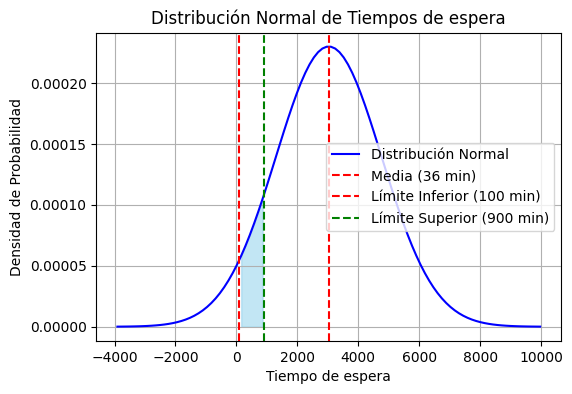

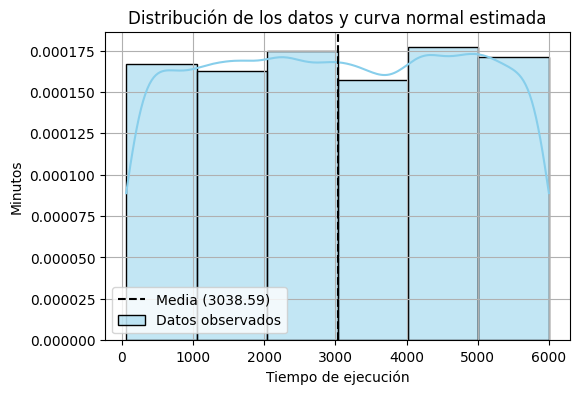

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#from ydata_profiling import ProfileReport

# Lee el archivo CSV en un DataFrame
#df = pd.read_csv("sample_data/optimized_processes_dataset_trans.csv")
#df = pd.read_csv('/content/optimized_processes_dataset_trans.csv', encoding='latin-1')
df = pd.read_csv("sample_data/optimized_processes_dataset_trans.csv", encoding='latin-1')
# Muestra las primeras 5 filas del DataFrame (opcional)
df.head()
# Análisis descriptivo numérico
#print(df.describe())

# Extraer la columna 'WaitTime' y convertirla a un array de NumPy

WaitTime=df['WaitTime'].values
WaitTime_array=np.array(WaitTime)
print(WaitTime_array)
print(len(WaitTime_array))

# Calcular estadísticas básicas de tiempo de espera

mean_wait = np.mean(WaitTime_array) #media
median_wait = np.median(WaitTime_array) #mediana
min_wait = np.min(WaitTime_array) #minimo
max_wait = np.max(WaitTime_array) #maximo
mode_wait = np.argmax(np.bincount(WaitTime_array)) #moda
varianza_wait = np.var(WaitTime_array) #varianza
desviacion_estandar_wait = np.std(WaitTime_array) #desviacion estandar

print("La media del los TiempoDeEspera es:", mean_wait)
print("La mediana del los TiempoDeEspera es:", median_wait)
print("El minimo valor de los TiempoDeEspera es:", min_wait)
print("El maximo valor de los TiempoDeEspera es:", max_wait)
print("La moda del los TiempoDeEspera es:",mode_wait)
print("La varianza del los TiempoDeEspera es:",varianza_wait)
print("La desviacion estandar del los TiempoDeEspera es:",desviacion_estandar_wait)

# Calcular estadísticas básicas de tiempos de ejecucion

mean_execution = np.mean(df['ExecutionTime'])
median_execution = np.median(df['ExecutionTime'])
min_execution = np.min(df['ExecutionTime'])
max_execution = np.max(df['ExecutionTime'])
mode_execution = np.argmax(np.bincount(df['ExecutionTime']))
varianza_execution = np.var(df['ExecutionTime'])
desviacion_estandar_execution = np.std(df['ExecutionTime'])

print ("La media de los tiempos de ejecución es:", mean_execution)
print ("La mediana de los tiempos de ejecución es:", median_execution)
print ("El mínimo valor de los tiempos de ejecución es:", min_execution)
print ("El máximo valor de los tiempos de ejecución es:", max_execution)
print ("La moda de los tiempos de ejecución es:", mode_execution)
print ("La varianza de los tiempos de ejecución es:", varianza_execution)
print ("La desviación estándar de los tiempos de ejecución es:", desviacion_estandar_execution)

# Calcular estadísticas básicas de niveles de prioridad

mean_priority = np.mean(df['PriorityLevel'])
median_priority = np.median(df['PriorityLevel'])
min_priority = np.min(df['PriorityLevel'])
max_priority = np.max(df['PriorityLevel'])
mode_priority = np.argmax(np.bincount(df['PriorityLevel']))


print ("La media de los niveles de prioridad es:", mean_priority)
print ("La mediana de los niveles de prioridad es:", median_priority)
print ("El mínimo valor de los niveles de prioridad es:", min_priority)
print ("El máximo valor de los niveles de prioridad es:", max_priority)
print ("La moda de los niveles de prioridad es:", mode_priority)

# Calcular estadísticas básicas de los recursos del CPU ResourceUsageCPUs

mean_cpu = np.mean(df['ResourceUsageCPUs'])
median_cpu = np.median(df['ResourceUsageCPUs'])
min_cpu = np.min(df['ResourceUsageCPUs'])
max_cpu = np.max(df['ResourceUsageCPUs'])
mode_cpu = np.argmax(np.bincount(df['ResourceUsageCPUs']))
varianza_cpu = np.var(df['ResourceUsageCPUs'])
desviacion_estandar_cpu = np.std(df['ResourceUsageCPUs'])

print ("La media de los recursos del CPU es:", mean_cpu)
print ("La mediana de los recursos del CPU es:", median_cpu)
print ("El mínimo valor de los recursos del CPU es:", min_cpu)
print ("El máximo valor de los recursos del CPU es:", max_cpu)
print ("La moda de los recursos del CPU es:", mode_cpu)
print ("La varianza de los recursos del CPU es:", varianza_cpu)
print ("La desviación estándar de los recursos del CPU es:", desviacion_estandar_cpu)

#Calcular estadísticas básicas de conteo de errores ErrorCount

mean_error = np.mean(df['ErrorCount'])
median_error = np.median(df['ErrorCount'])
min_error = np.min(df['ErrorCount'])
max_error = np.max(df['ErrorCount'])
rango_error = max_error - min_error
mode_error = np.argmax(np.bincount(df['ErrorCount']))

print ("La media del conteo de errores es:", mean_error)
print ("La mediana del conteo de errores es:", median_error)
print ("El mínimo valor del conteo de errores es:", min_error)
print ("El máximo valor del conteo de errores es:", max_error)
print ("El rango del conteo de errores es:", rango_error)
print ("La moda del conteo de errores es:", mode_error)

#Calcular estadísticas básicas de la salud de Transacción //TransactionHealth

mode_health = df['TransactionHealth'].mode()[0]
conteo_health = df['TransactionHealth'].value_counts()
print(conteo_health)
print("La moda de salud de Transacción es:", mode_health)

# Calcular estadísticas básicas de usuario de clasificación // UserClassification
mode_clasificacion=df['UserClassification'].mode()[0]
conteo=df['UserClassification'].value_counts()
print(conteo)
print("La moda de clasificación de usuario es:", mode_clasificacion)

# Calcular estadísticas básicas de id de producto //ProductId

mode_producto=df['ProductId'].mode()[0]
conteo_producto=df['ProductId'].value_counts()
print(conteo_producto)
print("La moda de id de producto es:", mode_producto)

# tiempo desde la creacion hasta el fin //CreationDate  y EndDate

# Convert 'CreationDate' and 'EndDate' to datetime objects
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

# Calculate the time difference
tiempocompleto = df['EndDate'] - df['CreationDate']
print(tiempocompleto)

moda_tiempocompleto = tiempocompleto.mode()[0]
print("La moda del tiempo completo es:", moda_tiempocompleto)

# Calcular estadísticas básicas fecha de inicio StartDate

# Convert 'StartDate' to datetime objects if it's not already
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')

# Now you can calculate the mean, but it will return a Timestamp object
mean_startdate = df['StartDate'].mean()

# For other statistics, you might need to work with the datetime objects directly:
median_startdate = df['StartDate'].quantile(0.5)  # Median for datetime
min_startdate = df['StartDate'].min()
max_startdate = df['StartDate'].max()
moda_startdate = df['StartDate'].mode()[0]
rango_startdate = max_startdate - min_startdate

print("La media de la fecha de inicio es:", mean_startdate)
print("La mediana de la fecha de inicio es:", median_startdate)
print("El mínimo valor de la fecha de inicio es:", min_startdate)
print("El máximo valor de la fecha de inicio es:", max_startdate)
print("La moda de la fecha de inicio es:", moda_startdate)
print("El rango de la fecha de inicio es:", rango_startdate)

# Calcular estadísticas básicas fecha de fin   EndDate

# Convert 'StartDate' to datetime objects if it's not already
df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')

# Now you can calculate the mean, but it will return a Timestamp object
mean_startdate = df['EndDate'].mean()

# For other statistics, you might need to work with the datetime objects directly:

median_EndDate= df['EndDate'].quantile(0.5)  # Median for datetime
min_EndDate = df['EndDate'].min()
max_EndDate = df['EndDate'].max()
moda_EndDate = df['EndDate'].mode()[0]
rango_EndDate = max_EndDate - min_EndDate


print("La mediana de la fecha de inicio es:", median_EndDate)
print("El mínimo valor de la fecha de inicio es:", min_EndDate)
print("El máximo valor de la fecha de inicio es:", max_EndDate)
print("La moda de la fecha de inicio es:", moda_EndDate)
print("El rango de la fecha de inicio es:", rango_EndDate)

# Calcular correlacion entre  banderas de exito y clasificacion de usuario  //SuccessFlag y UserClassification

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['UserClassification_Encoded'] = encoder.fit_transform(df['UserClassification'])

# Now calculate the correlation using the encoded column
correlacion1 = df['SuccessFlag'].corr(df['UserClassification_Encoded'])
print(f"La correlacion entre las variables es : {correlacion1:.4f}")

# Calcular correlacion entre ErrorCount y SuccessFlag

correlacion2 = df['ErrorCount'].corr(df['SuccessFlag'])
print(f"La correlacion entre las variables es : {correlacion2:.4f}")

#  Calcular correlacion entre NivelDePrioridad con BanderaDeÉxito  //PriorityLevel y SuccessFlag

correlacion3 = df['PriorityLevel'].corr(df['SuccessFlag'])
print(f"La correlacion entre las variables es : {correlacion3:.4f}")

#  Calcular correlacion entre  fecha de creacion y de fin.

correlacion4=df['CreationDate'].corr(df['EndDate'])
print(f"La correlacion entre las variables es : {correlacion4:.4f}")

#  Calcular correlacion entre fecha de creacion y ErrorCount

correlacion5 = df['CreationDate'].corr(df['ErrorCount'])
print(f"La correlacion entre las variables es : {correlacion5:.4f}")

# Gráfico de dispersión

plt.figure(figsize=(4, 3))
sns.scatterplot(x='CreationDate', y='ErrorCount', data=df)
plt.title("Relación entre Dia de creacion con errores contados")
plt.xlabel("Dia de creacion")
plt.ylabel("errores contados")
plt.show()


# Parámetros de la distribución normal
mu = mean_wait    # Media
sigma = desviacion_estandar_wait  # Desviación estándar

# Intervalo de tiempo de entrega
# x = np.linspace(30,40,100)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Probabilidad de que el tiempo de entrega esté entre 100 y 900 minutos
probabilidad = stats.norm.cdf(100, mu, sigma) - stats.norm.cdf(900, mu, sigma)
print(f"Probabilidad de que el tiempo de entrega esté entre 100 y 900 minutos: {probabilidad:.4f}")

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Distribución Normal', color='blue')
plt.fill_between(x, y, where=(x >= 100) & (x <= 900), color='skyblue', alpha=0.5) # Mostrar espacio entre numeros de probabilidad calculados
plt.axvline(mu, color='red', linestyle='dashed', label='Media (36 min)')
plt.axvline(100, color='red', linestyle='dashed', label='Límite Inferior (100 min)')
plt.axvline(900, color='green', linestyle='dashed', label='Límite Superior (900 min)')
plt.title('Distribución Normal de Tiempos de espera')
plt.xlabel('Tiempo de espera')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.show()

from scipy.stats import norm

# Parámetros de la distribución normal estimada ExecutionTime
media = mean_execution
desviacion = desviacion_estandar_execution

# Generamos una distribución normal con la misma media y desviación estándar
x = np.linspace(media - 3*desviacion, media + 3*desviacion, 100)
y = norm.pdf(x, media, desviacion)

# Crear el gráfico
plt.figure(figsize=(6, 4))
sns.histplot(df['ExecutionTime'], kde=True, bins=6, color='skyblue', stat="density", label="Datos observados")
#plt.plot(x, y, 'r-', label="Distribución Normal Estimada")
plt.axvline(media, color='black', linestyle='dashed', label=f"Media ({media:.2f})")

# Etiquetas y leyenda
plt.title("Distribución de los datos y curva normal estimada")
plt.xlabel("Tiempo de ejecución")
plt.ylabel("Minutos")
plt.legend()
plt.grid()

# Mostrar gráfico
plt.show()

columnas categóricas adicionales

In [ ]:
mode_modulo=df['ModuleId'].mode()[0]
conteo_modulo=df['ModuleId'].value_counts()
print(conteo_modulo)
print("La moda de id de modulo es:", mode_modulo)

# Calcular variable categorica de tipo de proceso //ProcessType

mode_tipo=df['ProcessType'].mode()[0]
conteo_tipo=df['ProcessType'].value_counts()
print(conteo_tipo)
print("La moda de tipo de proceso es:", mode_tipo)

# Calcular variable categorica de banderas de exito  //SuccessFlag

mode_bandera=df['SuccessFlag'].mode()[0]
conteo_bandera=df['SuccessFlag'].value_counts()
print(conteo_bandera)
print("La moda de banderas de exito es:", mode_bandera)


ModuleId
MOD9     3158
MOD5     3095
MOD2     3051
MOD6     3031
MOD8     3027
MOD7     2975
MOD10    2961
MOD3     2957
MOD4     2920
MOD1     2825
Name: count, dtype: int64
La moda de id de modulo es: MOD9
ProcessType
RiskAssesment     10024
Excel Download     9988
PDF Download       9988
Name: count, dtype: int64
La moda de tipo de proceso es: RiskAssesment
SuccessFlag
False    15023
True     14977
Name: count, dtype: int64
La moda de banderas de exito es: False


#Visualizacion

Para entender mas afondo la informacion, se corrieron graficos como el histograma para entender la distribucion. Tambien se utiliza la distribucion logaritmica para reducir los sesgos y dar mas simetria dentro de los valores encontrados.

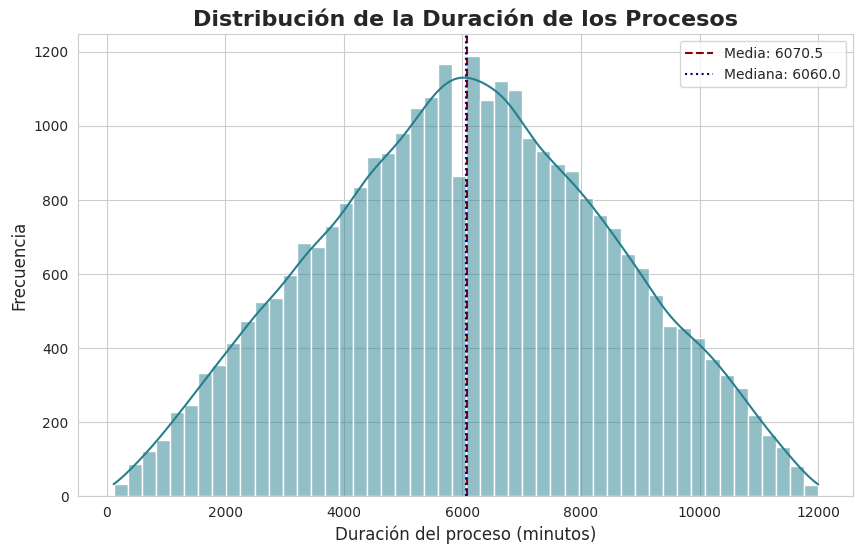

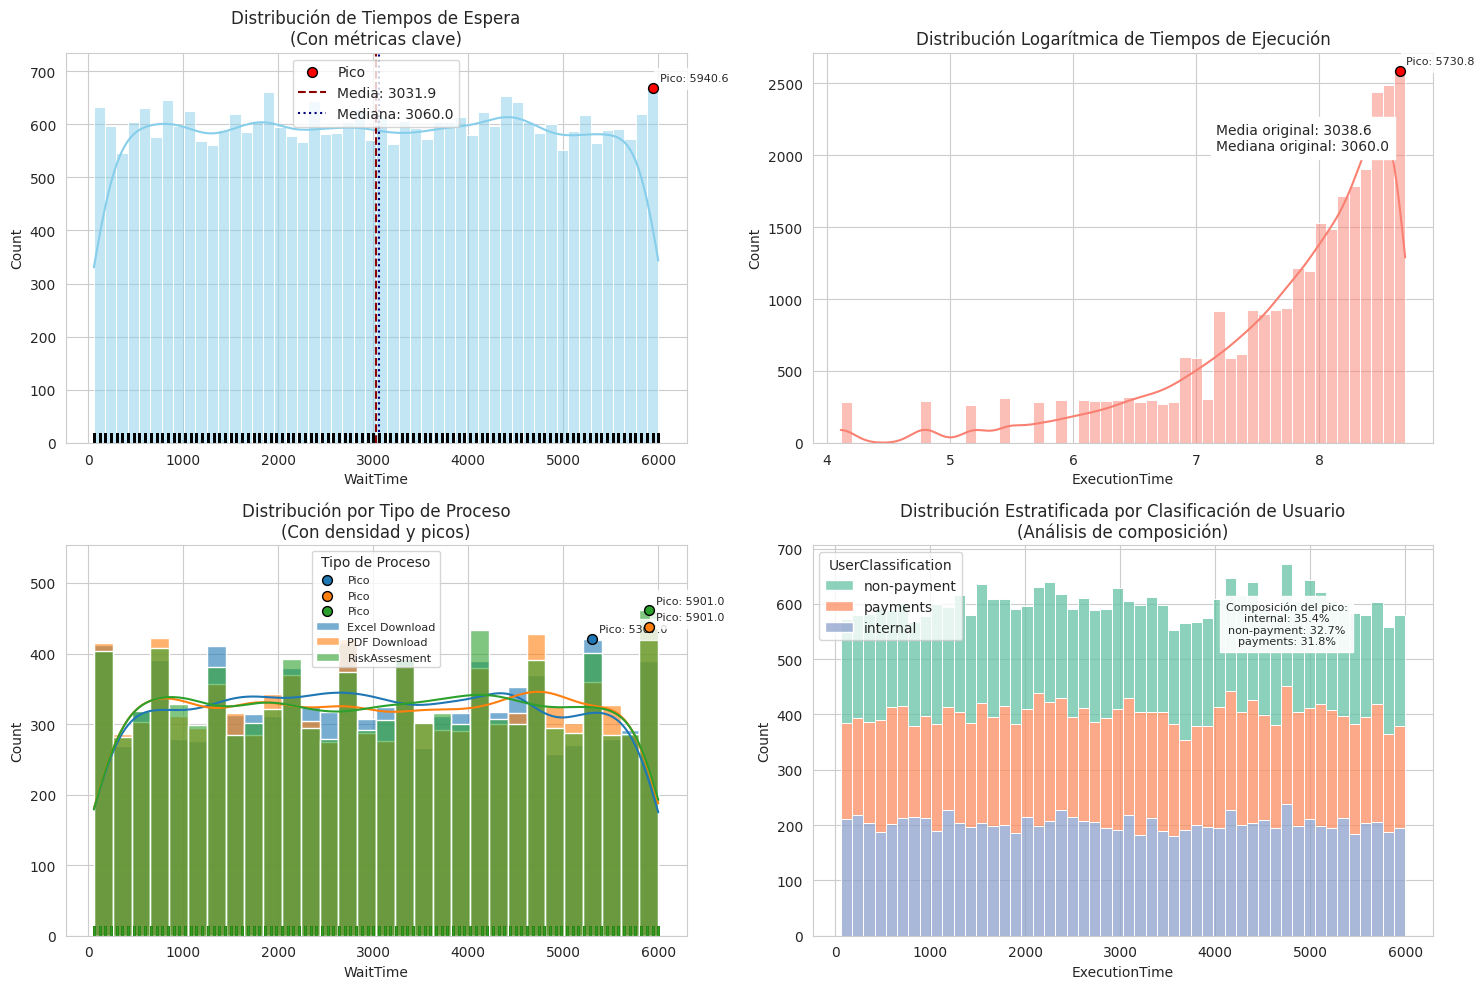

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_process_duration_distribution(df: pd.DataFrame) -> None:
    """
    Grafica la distribución de la duración de los procesos, calculada como la suma de WaitTime y ExecutionTime.
    """
    df['ProcessDuration'] = df['WaitTime'] + df['ExecutionTime']
    plt.figure(figsize=(10, 6))
    color = sns.color_palette("viridis")[2]
    sns.histplot(df['ProcessDuration'], bins=50, kde=True, color=color)
    plt.title('Distribución de la Duración de los Procesos', fontsize=16, weight='bold')
    plt.xlabel('Duración del proceso (minutos)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.axvline(df['ProcessDuration'].mean(), color='darkred', linestyle='--', label=f'Media: {df["ProcessDuration"].mean():.1f}')
    plt.axvline(df['ProcessDuration'].median(), color='navy', linestyle=':', label=f'Mediana: {df["ProcessDuration"].median():.1f}')
    plt.legend()
    plt.show()

def plot_peak(data: np.ndarray, ax: plt.Axes, bins: int, color: str = 'red', log_scale: bool = False) -> None:
    """
    Calcula y marca el pico en los datos del histograma sobre el eje proporcionado.

    Args:
        data: Datos numéricos (array o Series) a analizar.
        ax: Objeto Axes de matplotlib donde se dibuja el pico.
        bins: Número de bins para el histograma.
        color: Color a utilizar para marcar el pico.
        log_scale: Si es True, ajusta el label para datos en escala logarítmica.
    """
    counts, edges = np.histogram(data, bins=bins)
    if len(counts) == 0:
        return
    max_idx = np.argmax(counts)
    peak_x = (edges[max_idx] + edges[max_idx + 1]) / 2
    peak_y = counts[max_idx]

    label = f'Pico: {np.expm1(peak_x):.1f}' if log_scale else f'Pico: {peak_x:.1f}'
    ax.scatter(peak_x, peak_y, color=color, s=50, zorder=5, edgecolor='black', label='Pico')
    ax.annotate(label, (peak_x, peak_y), xytext=(5, 5), textcoords='offset points',
                fontsize=8, bbox=dict(facecolor='white', alpha=0.8))

def plot_wait_time_histogram(ax: plt.Axes, wait_time: pd.Series) -> None:
    """
    Grafica el histograma de tiempos de espera, incluyendo líneas para la media, mediana y anotación del pico.
    """
    data = wait_time.dropna()
    sns.histplot(data, bins=50, kde=True, ax=ax, color='skyblue')
    plot_peak(data, ax, bins=50)
    ax.axvline(data.mean(), color='darkred', linestyle='--', label=f'Media: {data.mean():.1f}')
    ax.axvline(data.median(), color='navy', linestyle=':', label=f'Mediana: {data.median():.1f}')
    sns.rugplot(data, ax=ax, color='black', alpha=0.1)
    ax.set_title('Distribución de Tiempos de Espera\n(Con métricas clave)', fontsize=12)
    ax.legend()

def plot_log_execution_time(ax: plt.Axes, execution_time: pd.Series) -> None:
    """
    Grafica el histograma de tiempos de ejecución transformados a escala logarítmica, marcando el pico y mostrando
    estadísticas en la escala original.
    """
    log_data = np.log1p(execution_time)
    sns.histplot(log_data, bins=50, kde=True, ax=ax, color='salmon')
    plot_peak(log_data, ax, bins=50, log_scale=True)

    original_mean = np.expm1(log_data).mean()
    original_median = np.expm1(np.median(log_data))
    ax.text(0.65, 0.75, f"Media original: {original_mean:.1f}\nMediana original: {original_median:.1f}",
            transform=ax.transAxes, bbox=dict(facecolor='white'))
    ax.set_title('Distribución Logarítmica de Tiempos de Ejecución', fontsize=12)

def plot_wait_time_by_process_type(ax: plt.Axes, df: pd.DataFrame) -> None:
    """
    Grafica histogramas superpuestos de tiempos de espera para cada tipo de proceso, incluyendo picos y rug plots.
    """
    palette = sns.color_palette("tab10")
    for i, process in enumerate(df['ProcessType'].unique()):
        subset = df[df['ProcessType'] == process]['WaitTime'].dropna()
        if subset.empty:
            continue
        sns.histplot(subset, bins=30, kde=True, ax=ax, alpha=0.6, color=palette[i], label=process)
        plot_peak(subset, ax, bins=30, color=palette[i])
        sns.rugplot(subset, ax=ax, color=palette[i], alpha=0.2)
    ax.set_title('Distribución por Tipo de Proceso\n(Con densidad y picos)', fontsize=12)
    ax.legend(title='Tipo de Proceso', fontsize=8)

def plot_execution_time_by_user_classification(ax: plt.Axes, df: pd.DataFrame) -> None:
    """
    Grafica un histograma apilado de tiempos de ejecución estratificado por clasificación de usuario y analiza
    la composición del pico principal.
    """
    sns.histplot(data=df, x='ExecutionTime', hue='UserClassification', bins=50, multiple="stack",
                 ax=ax, palette='Set2')

    execution_data = df['ExecutionTime'].dropna()
    total_counts, edges = np.histogram(execution_data, bins=50)
    if len(total_counts) == 0:
        return
    max_idx = np.argmax(total_counts)
    peak_x = (edges[max_idx] + edges[max_idx + 1]) / 2

    composition = df[(df['ExecutionTime'] >= edges[max_idx]) & (df['ExecutionTime'] < edges[max_idx + 1])]
    composition = composition['UserClassification'].value_counts(normalize=True)
    comp_text = "Composición del pico:\n" + "\n".join([f"{k}: {v*100:.1f}%" for k, v in composition.items()])

    ax.text(peak_x, total_counts[max_idx] * 0.9, comp_text, ha='center', va='top', fontsize=8,
            bbox=dict(facecolor='white', alpha=0.9))
    ax.set_title('Distribución Estratificada por Clasificación de Usuario\n(Análisis de composición)', fontsize=12)

def main() -> None:
    """
    Función principal que carga el dataset y ejecuta el despliegue de todos los gráficos y análisis.
    """
    # Cargar el dataset desde la ruta proporcionada
    data_path = "sample_data/optimized_processes_dataset_trans.csv"
    df = pd.read_csv(data_path)

    # Insight 1: Distribución de la duración de los procesos
    plot_process_duration_distribution(df)

    # Gráficos complementarios en una cuadrícula
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    plot_wait_time_histogram(axes[0, 0], df['WaitTime'])
    plot_log_execution_time(axes[0, 1], df['ExecutionTime'])
    plot_wait_time_by_process_type(axes[1, 0], df)
    plot_execution_time_by_user_classification(axes[1, 1], df)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

# Resultados obtenidos
## Distribución de Tiempos de Espera:

La mediana **(3060)** es cercana a la media **(3031.9)**, lo que sugiere una distribución relativamente simétrica, pero el pico en **5940.6** indica la presencia de procesos excepcionalmente largos.

*Acción*: Investigar qué causa los tiempos de espera extremos.

## Distribución por Tipo de Proceso:

Múltiples picos **(5301, 5801, 5901)** sugieren que ciertos tipos de procesos tienen tiempos de espera característicos.

Acción: Analizar cada tipo de proceso para optimizar recursos en los rangos con mayor frecuencia.

## Distribución Logarítmica de Tiempos de Ejecución:

La media y mediana originales son similares, pero la desviación **(Dec. 5730.8)** refleja alta variabilidad.

Acción: Segmentar análisis por categorías para entender fuentes de variabilidad.

## Estratificación por Clasificación de Usuario:

La composición del pico muestra contribuciones equilibradas **(3.2% en incremento y pagamento)**.

Acción: Priorizar optimizaciones en las clasificaciones con mayor impacto en el pico.



#Valores atípicos

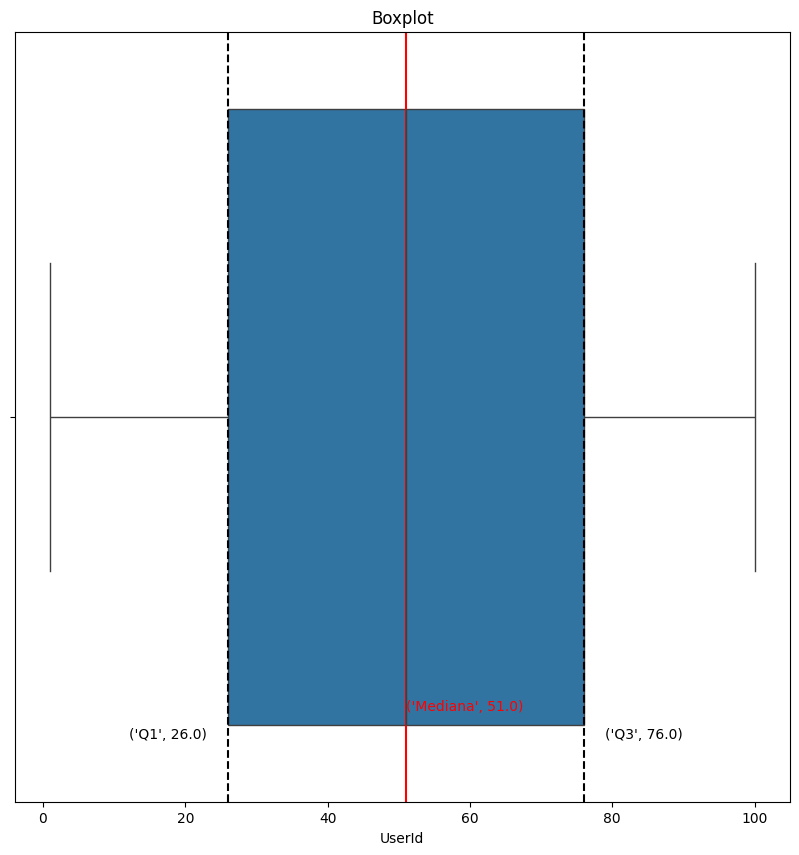

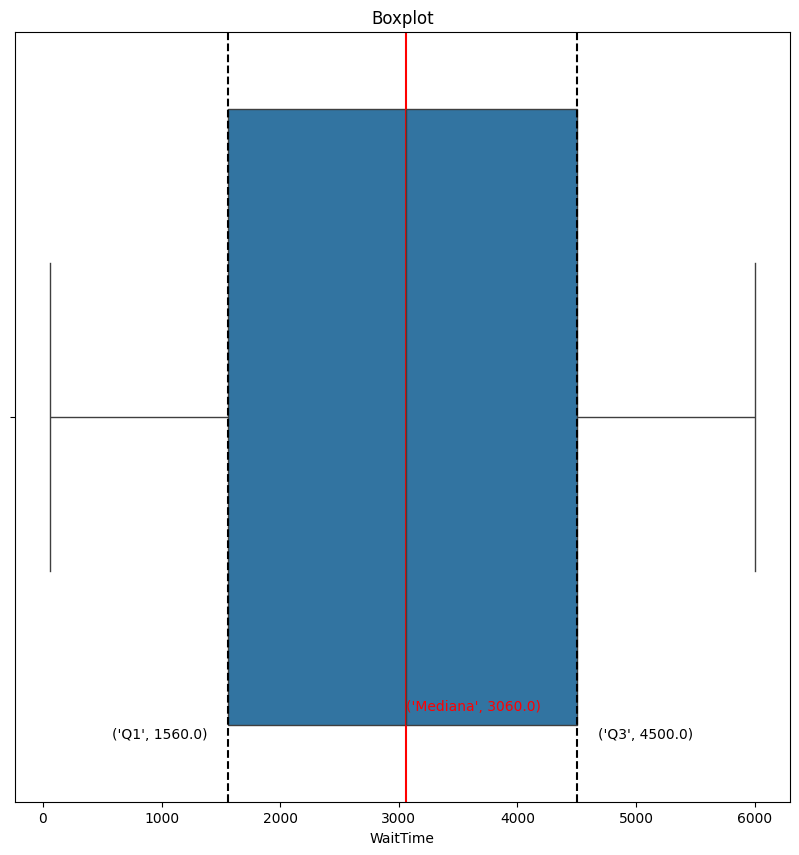

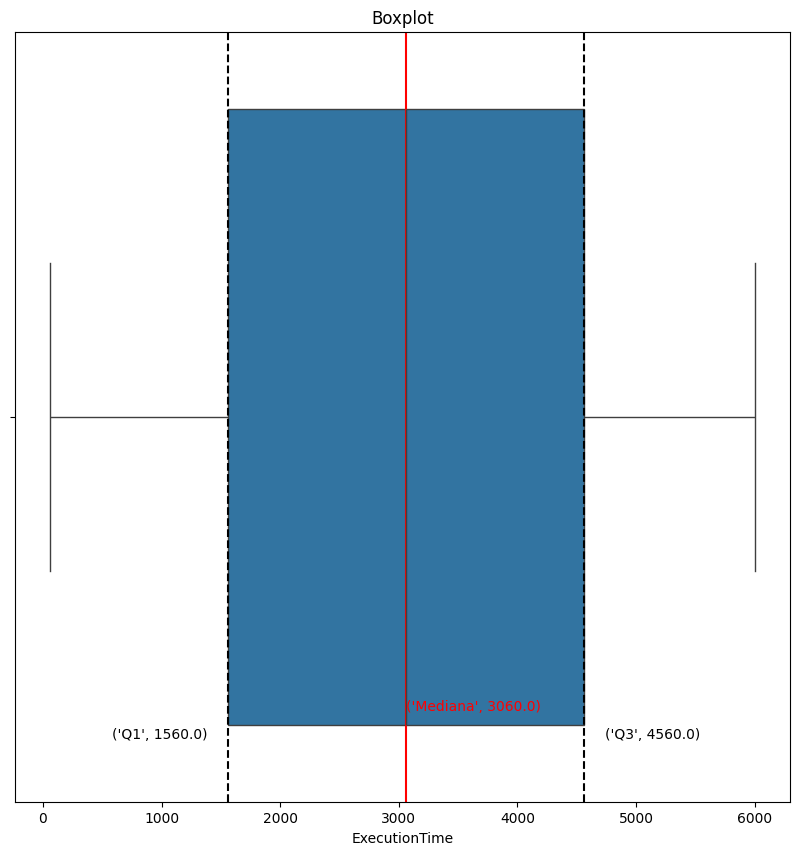

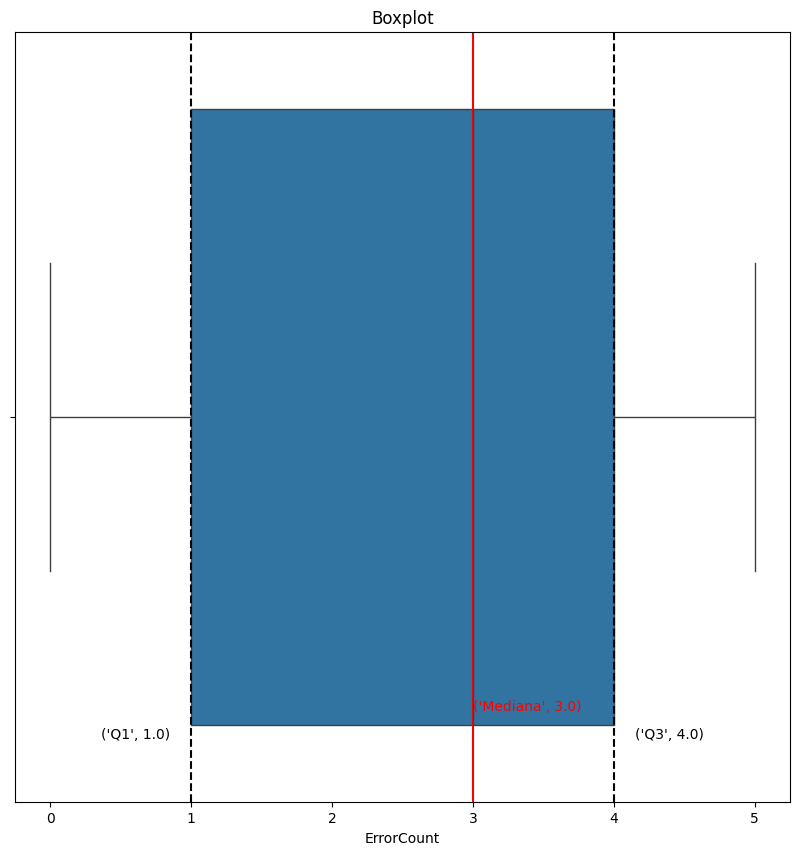

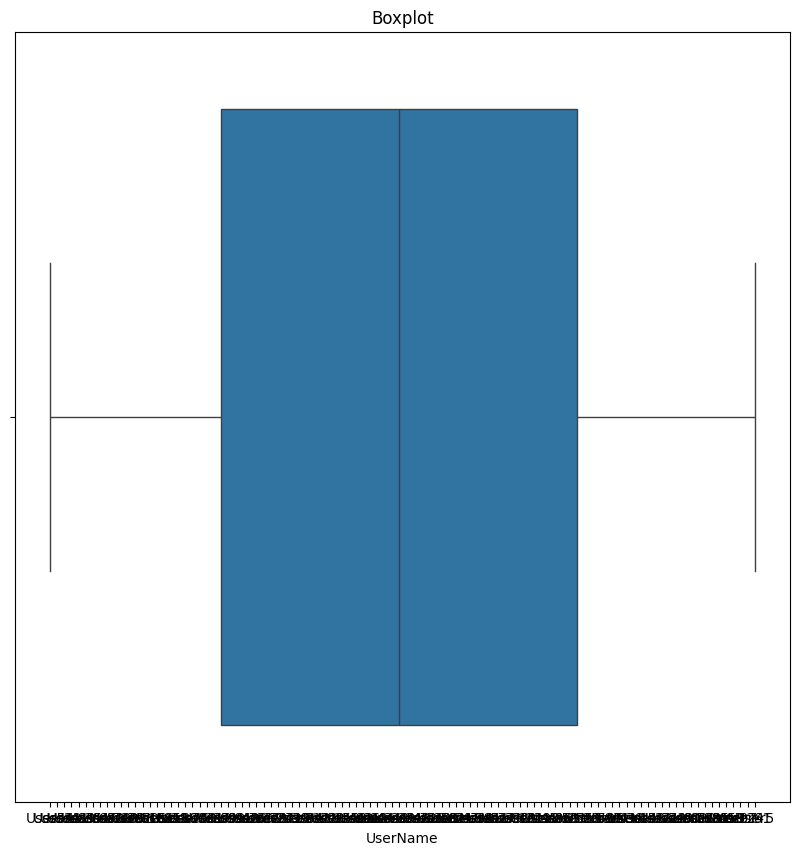

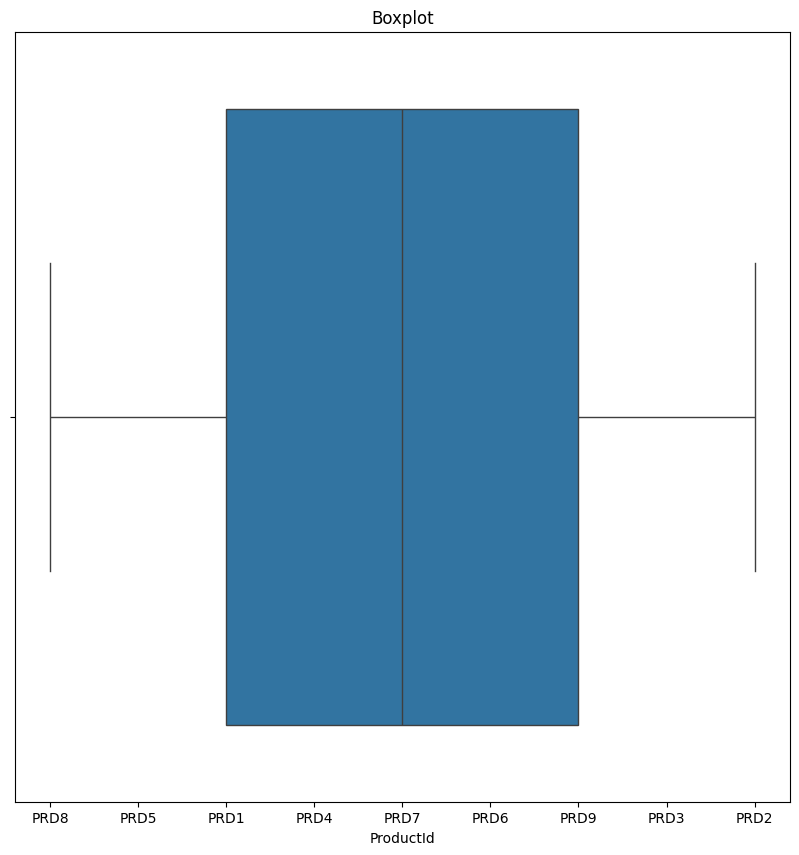

Correlación entre el tiempo de espera y el nivel de prioridad.
0.0027884962114196853
Correlación entre el total de errores por transacción y su resultado
0.0056947125173804096


Correlación entre UserId y WaitTime:  0.009314034522296752
Correlación entre UserId y ExecutionTime:  -0.006600198802694466
Correlación entre UserId y PriorityLevel:  0.007879048309431234
Correlación entre UserId y ResourceUsageCPUs:  0.0035703001432928812
Correlación entre UserId y ErrorCount:  3.5589852404405346e-06


Correlación entre WaitTime y UserId:  0.009314034522296752
Correlación entre WaitTime y ExecutionTime:  0.002021838329869512
Correlación entre WaitTime y PriorityLevel:  0.0027884962114196853
Correlación entre WaitTime y ResourceUsageCPUs:  0.0013716100717782458
Correlación entre WaitTime y ErrorCount:  0.0014353583122457298


Correlación entre ExecutionTime y UserId:  -0.006600198802694466
Correlación entre ExecutionTime y WaitTime:  0.002021838329869512
Correlación entre ExecutionTime y Priori

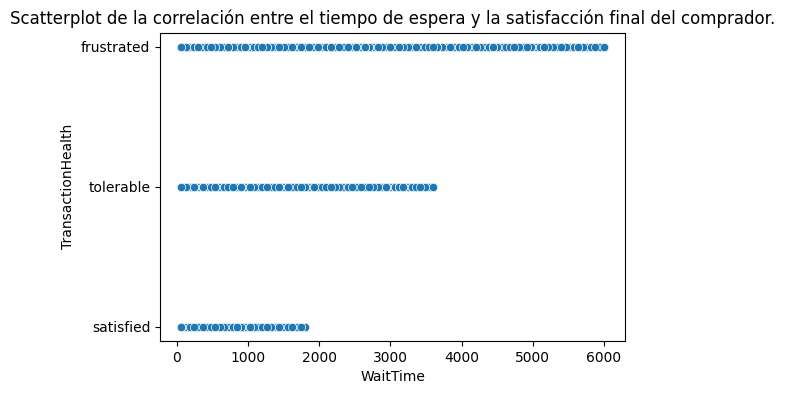

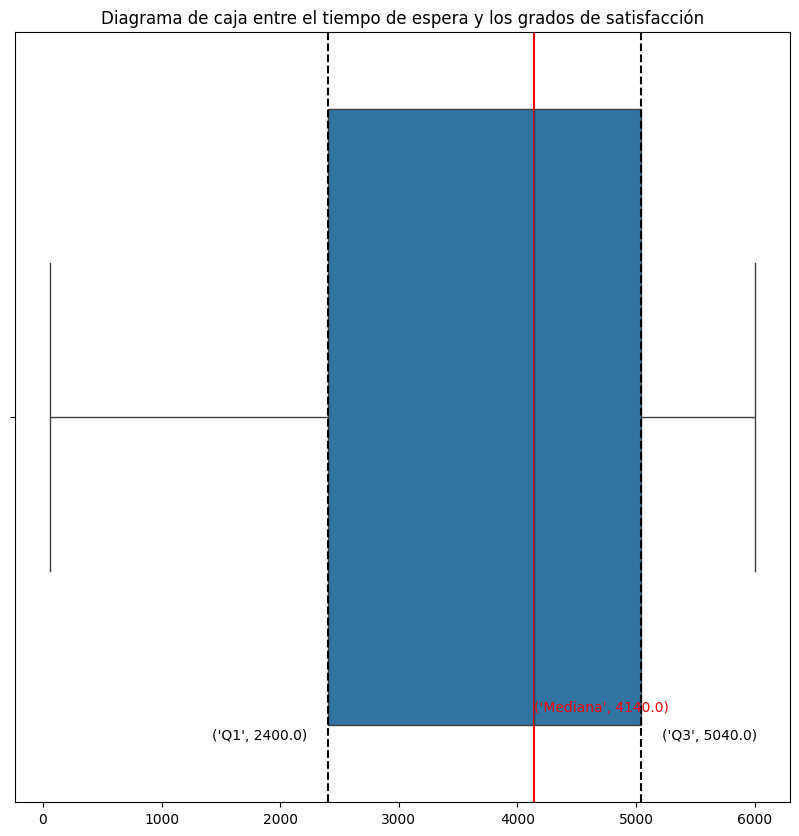

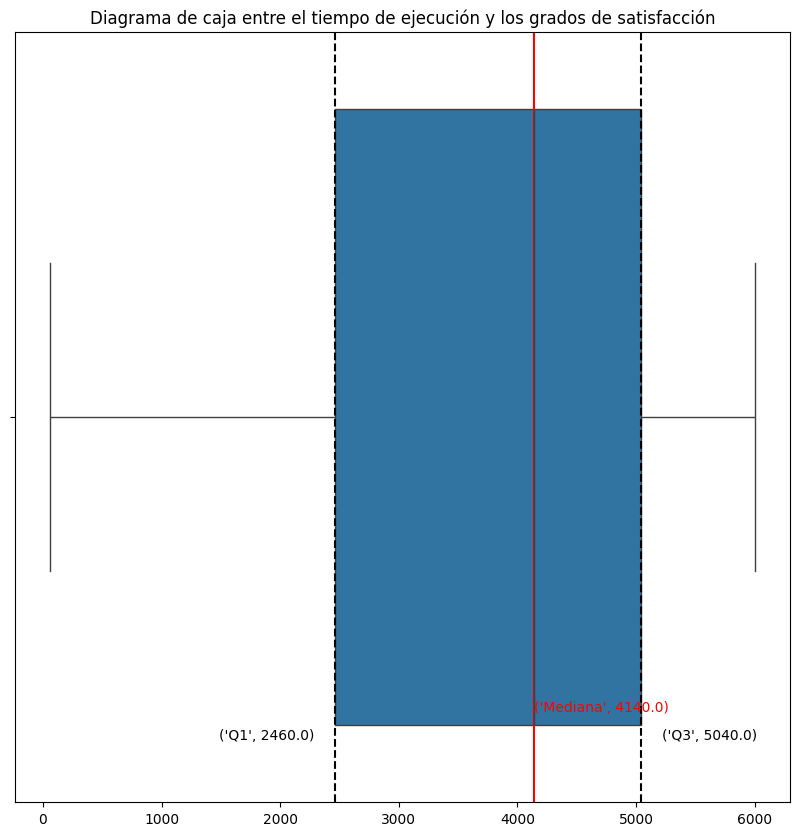

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lee el archivo CSV en un DataFrame
df = pd.read_csv('sample_data/optimized_processes_dataset_trans.csv')

# Búsqueda de datos atípicos
# Diagramas de cajas con variables de tipo númerico o contables
UserID = df["UserId"]
ProductId = df["ProductId"]
UserName = df["UserName"]
WaitTime = df["WaitTime"]
ExecutionTime = df["ExecutionTime"]
ErrorCount = df["ErrorCount"]

datosboxplots = [UserID, WaitTime, ExecutionTime, ErrorCount, UserName, ProductId]

#Función para crear un diagrama de caja con entrada de tipo objeto
def generar_boxplot_pd(datos):
  for i in datos:
    # Límites y rango intercuartílico
    Q1 = None
    Q2 = None
    median = None
    if type(i.iloc[0]) != str:
      Q1 = np.percentile(i, 25)
      Q3 = np.percentile(i, 75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      median = np.median(i)
    #Visualizar
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=i)
    sns.boxenplot()
    plt.title("Boxplot")
    if Q1!=None:
      plt.axvline(Q1, color='black', linestyle='--')
      plt.axvline(Q3, color='black', linestyle='--')
      plt.axvline(median, color='red', linestyle='-')
      plt.annotate(("Q1",Q1), (Q1, 0.4), textcoords="offset points", xytext=(-15,-10), ha="right", fontsize=10)
      plt.annotate(("Q3",Q3), (Q3, 0.4), textcoords="offset points", xytext=(15,-10), ha='left', fontsize=10)
      plt.annotate(("Mediana",median), (median, 0.4), textcoords="offset points", xytext=(0,10), ha='left', fontsize=10, color='red')
    plt.show()

generar_boxplot_pd(datosboxplots)



# Correlación entre las variables
print("Correlación entre el tiempo de espera y el nivel de prioridad.")
correlacion = df["WaitTime"].corr(df["PriorityLevel"])
print(correlacion)
print("Correlación entre el total de errores por transacción y su resultado")
correlacion = df["ErrorCount"].corr(df["SuccessFlag"])
print(correlacion)


#Correlacion de todas las variables
solo_datos_numericos = [UserID, WaitTime, ExecutionTime, df["PriorityLevel"],df["ResourceUsageCPUs"],ErrorCount]
for i in solo_datos_numericos:
  print("\n")
  for f in solo_datos_numericos:
    if({i.name}!={f.name}):
      print(f"Correlación entre {i.name} y {f.name}: ",i.corr(f))



#Diagrama de dispersión
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=df["WaitTime"], y=df["TransactionHealth"])
plt.title("Scatterplot de la correlación entre el tiempo de espera y la satisfacción final del comprador.")
plt.show()

#Función para crear un diagrama de cajas con entrada de tipo lista
def generar_boxplot_list(datos,titulo):
  plt.figure(figsize=(10, 10))
  sns.boxplot(x=datos)
  sns.boxenplot()
  plt.title(titulo)
  datos.sort()
  Q1 = np.percentile(datos, 25)
  median = np.median(datos)
  Q3 = np.percentile(datos, 75)
  plt.axvline(Q1, color='black', linestyle='--')
  plt.axvline(Q3, color='black', linestyle='--')
  plt.axvline(median, color='red', linestyle='-')
  plt.annotate(("Q1",Q1), (Q1, 0.4), textcoords="offset points", xytext=(-15,-10), ha="right", fontsize=10)
  plt.annotate(("Q3",Q3), (Q3, 0.4), textcoords="offset points", xytext=(15,-10), ha='left', fontsize=10)
  plt.annotate(("Mediana",median), (median, 0.4), textcoords="offset points", xytext=(0,10), ha='left', fontsize=10, color='red')
  plt.show()

#Diagrama de caja entre el tiempo de espera y los grados de satisfacción
TransactionHealth = df["TransactionHealth"]
waitfrus = []
for i in range(len(WaitTime)):
  if TransactionHealth[i]=="frustrated":
    waitfrus+=[WaitTime[i]]

generar_boxplot_list(waitfrus, "Diagrama de caja entre el tiempo de espera y los grados de satisfacción")

#Diagrama de caja entre el tiempo de ejecución y los grados de satisfacción
executfrus = []

for i in range(len(ExecutionTime)):
  if TransactionHealth[i]=="frustrated":
    executfrus+=[ExecutionTime[i]]

generar_boxplot_list(executfrus, "Diagrama de caja entre el tiempo de ejecución y los grados de satisfacción")

#Correlacion
- UserId + Priority Level
- UserId + WaitTime
- UserId + ejecutionTime
- UserId + errorCount
- UserId + resourageCPUs

<Figure size 5000x3500 with 0 Axes>

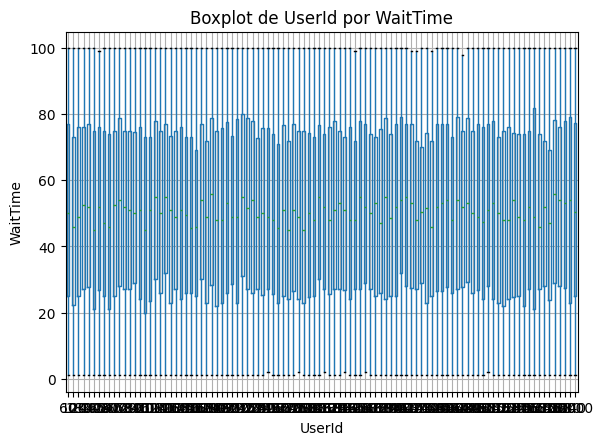

<Figure size 1000x600 with 0 Axes>

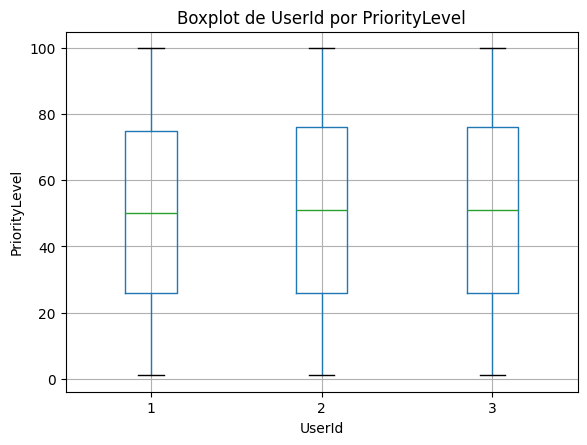

<Figure size 5000x3500 with 0 Axes>

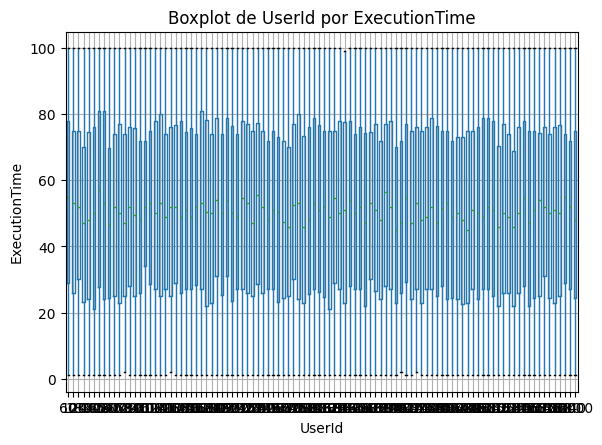

<Figure size 1000x600 with 0 Axes>

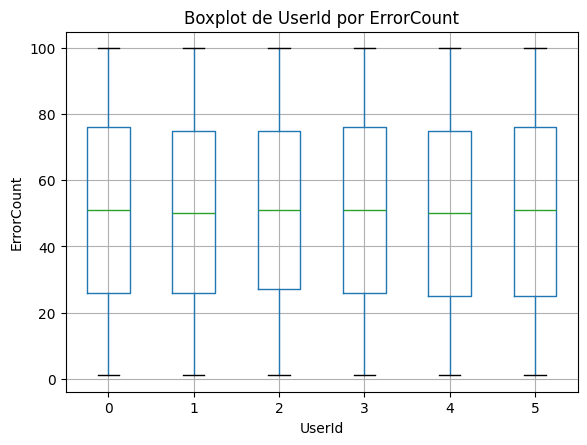

<Figure size 5000x3500 with 0 Axes>

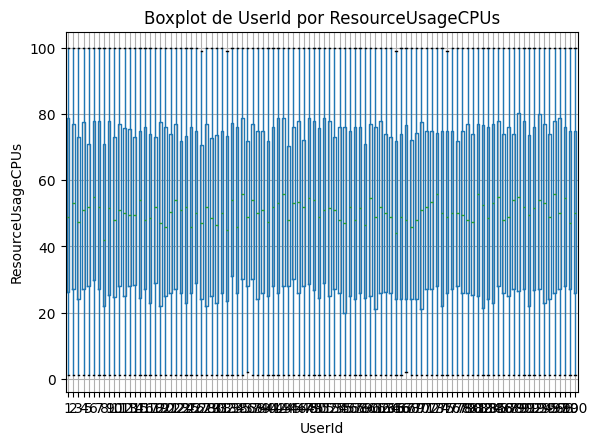

<Figure size 5000x3500 with 0 Axes>

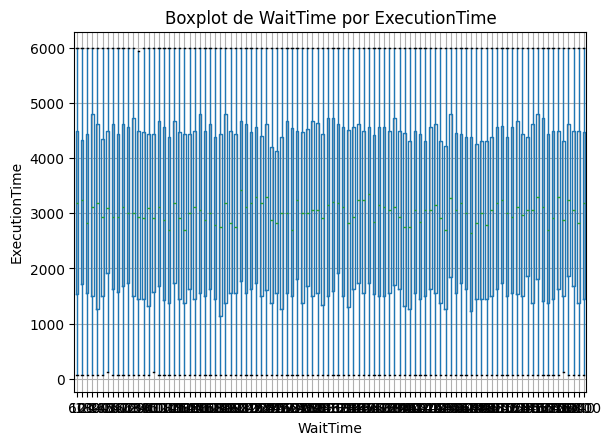

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo CSV
file_path = 'sample_data/optimized_processes_dataset_trans.csv'
data = pd.read_csv(file_path)

# boxplot userid y waittime
plt.figure(figsize=(50, 35))
data.boxplot(column='UserId', by='WaitTime')
plt.title('Boxplot de UserId por WaitTime')
plt.suptitle('')  # Para eliminar el título predeterminado de Matplotlib
plt.xlabel('UserId')
plt.ylabel('WaitTime')
plt.show()

# boxplot userid y prioritylevel
plt.figure(figsize=(10, 6))
data.boxplot(column='UserId', by='PriorityLevel')
plt.title('Boxplot de UserId por PriorityLevel')
plt.suptitle('')  # Para eliminar el título predeterminado de Matplotlib
plt.xlabel('UserId')
plt.ylabel('PriorityLevel')
plt.show()

# boxplot userid y ejecution time
plt.figure(figsize=(50, 35))
data.boxplot(column='UserId', by='ExecutionTime')
plt.title('Boxplot de UserId por ExecutionTime')
plt.suptitle('')  # Para eliminar el título predeterminado de Matplotlib
plt.xlabel('UserId')
plt.ylabel('ExecutionTime')
plt.show()

# boxplot userid y errorcount
plt.figure(figsize=(10, 6))
data.boxplot(column='UserId', by='ErrorCount')
plt.title('Boxplot de UserId por ErrorCount')
plt.suptitle('')  # Para eliminar el título predeterminado de Matplotlib
plt.xlabel('UserId')
plt.ylabel('ErrorCount')
plt.show()

# boxplot userid y ResourceUsageCPUs
plt.figure(figsize=(50, 35))
data.boxplot(column='UserId', by='ResourceUsageCPUs')
plt.title('Boxplot de UserId por ResourceUsageCPUs')
plt.suptitle('')  # Para eliminar el título predeterminado de Matplotlib
plt.xlabel('UserId')
plt.ylabel('ResourceUsageCPUs')
plt.show()

# boxplot WaitTime y EjecutionTime
plt.figure(figsize=(50, 35))
data.boxplot(column='WaitTime', by='ExecutionTime')
plt.title('Boxplot de WaitTime por ExecutionTime')
plt.suptitle('')  # Para eliminar el título predeterminado de Matplotlib
plt.xlabel('WaitTime')
plt.ylabel('ExecutionTime')
plt.show()

# ***Algoritmo de Arbol de Decisiones***

## *Leyendo dataset*




Removiendo columnas innecesarias, caracteristicas implementadas con la finalidad de dar una mejor ramificacion al arbol de decision.

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/optimized_processes_dataset_trans.csv')

# Revision de columnas para asegurar que todas existan
columnas_a_eliminar = ['TrackId', 'CreationDate', 'StartDate', 'EndDate', 'UserId', 'UserName', 'UserClientName'] # Innecesarias para el arbol
columnas_existentes = df.columns.tolist()  # Extraccion de nombres de columnas

columnas_a_eliminar = [col for col in columnas_a_eliminar if col in columnas_existentes]  # Filter out non-existent columns
print(columnas_a_eliminar)
# Remover columnas de la lista
df = df.drop(columns=columnas_a_eliminar)

['TrackId', 'CreationDate', 'StartDate', 'EndDate', 'UserId', 'UserName', 'UserClientName']


## **Nuevo estado del dataset**

In [ ]:
print(df)

      ModuleId ProductId  WaitTime  ExecutionTime     ProcessType  \
0         MOD3      PRD8      4440           5820  Excel Download   
1         MOD9      PRD5      2820           1620    PDF Download   
2         MOD3      PRD5        60           4680  Excel Download   
3         MOD2      PRD5      3120           4740   RiskAssesment   
4         MOD4      PRD1      4320           4920    PDF Download   
...        ...       ...       ...            ...             ...   
29995     MOD4      PRD4       480           4680    PDF Download   
29996    MOD10      PRD1      1500           4140   RiskAssesment   
29997     MOD4      PRD9      1740           3900   RiskAssesment   
29998    MOD10      PRD3      1440           6000    PDF Download   
29999     MOD7      PRD1      1980           4440  Excel Download   

       PriorityLevel  ResourceUsageCPUs  ErrorCount  SuccessFlag  \
0                  2                 49           5        False   
1                  3               

Adicion de **OneHotEncoder** para la transformacion de columnas categoricas a formato codificado.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
categoricas = ['ProcessType', 'TransactionHealth', 'ModuleId', 'ProductId']
encoded_features = encoder.fit_transform(df[categoricas]).toarray()
df_encoded = pd.concat([df.drop(columns=categoricas), pd.DataFrame(encoded_features)], axis=1)

In [ ]:
print(df_encoded)

       WaitTime  ExecutionTime  PriorityLevel  ResourceUsageCPUs  ErrorCount  \
0          4440           5820              2                 49           5   
1          2820           1620              3                 43           2   
2            60           4680              3                 77           5   
3          3120           4740              2                 76           3   
4          4320           4920              2                 81           3   
...         ...            ...            ...                ...         ...   
29995       480           4680              3                 99           2   
29996      1500           4140              2                 64           4   
29997      1740           3900              1                 49           0   
29998      1440           6000              1                 99           4   
29999      1980           4440              3                 73           0   

       SuccessFlag UserClassification  

# Visualizacion de la distribucion de valores por tipo de usuario

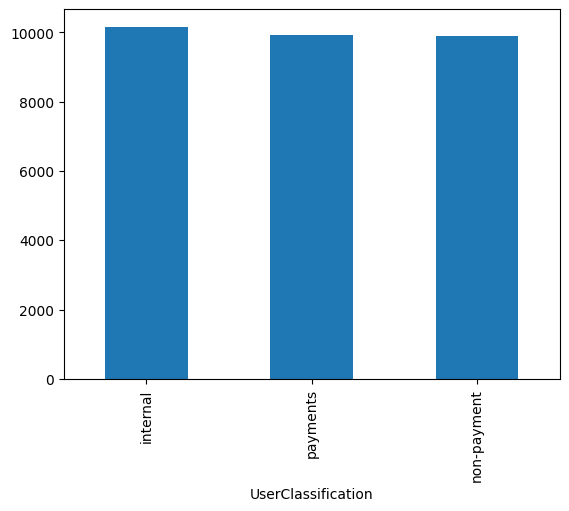

In [ ]:
df['UserClassification'].value_counts().plot(kind='bar')

# Correlacion de valores para el modelo

<Axes: >

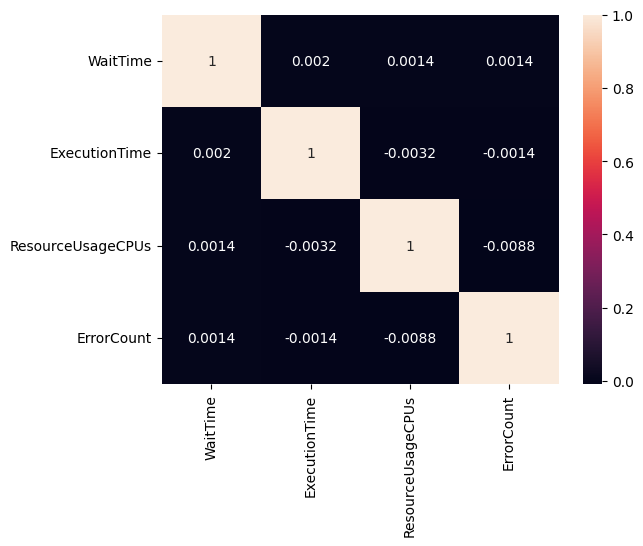

In [ ]:
import seaborn as sns
sns.heatmap(df[['WaitTime', 'ExecutionTime', 'ResourceUsageCPUs', 'ErrorCount']].corr(), annot=True)

# **Interpretacion de Matriz de Correlación**

## Resumen de la Matriz de Correlación Analizada:

### Variables Analizadas:

* WaitTime (tiempo de espera).

* ExecutionTime (tiempo de ejecución).

* ResourceUsageCPUs (uso de CPU).

* ErrorCount (número de errores).



***Hallazgos Clave:***

Todas las correlaciones son muy débiles (valores entre -0.0088 y 0.002).

***Correlaciones más relevantes:***

ResourceUsageCPUs vs ErrorCount: -0.0088 (ligera tendencia negativa).

ExecutionTime vs ResourceUsageCPUs: -0.0032 (correlación casi nula).

Ninguna variable muestra una relación lineal fuerte con las demás.

**Interpretación:**

Las variables no están linealmente relacionadas en este conjunto de datos.

Por ejemplo:

Un alto tiempo de espera (WaitTime) no implica mayor tiempo de ejecución (ExecutionTime).

Un alto uso de CPU (ResourceUsageCPUs) no está vinculado a más errores (ErrorCount).

## Conclusión General:

Independencia entre variables: Los datos sugieren que los tiempos, el uso de recursos y los errores operan de manera independiente en este contexto.

Correlación ≠ Causalidad: Aunque no hay correlación, podrían existir relaciones no lineales o factores externos no medidos.

Recomendación:
Explorar otros métodos (análisis no lineales, variables categóricas o factores externos) para identificar posibles causas de errores o ineficiencias en los procesos.

# Segmentacion de informacion para entrenamiento

**train_test_split** nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo.



```
# Ejemplo de ejecucion

import pandas as pd
from sklearn.model_selection import train_test_split

# Dataset de ejemplo
datos = {
    'Horas_Estudio': [2, 3, 4, 5, 6],
    'Aprobado': [0, 0, 1, 1, 1]
}
df = pd.DataFrame(datos)

# Separar características (X) y target (y)
X = df[['Horas_Estudio']]
y = df['Aprobado']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resultados
print("Entrenamiento (X):\n", X_train)
print("\nPrueba (X):\n", X_test)
print("\nEntrenamiento (y):", y_train.values)
print("Prueba (y):", y_test.values)

```



Pasos:

Crea un DataFrame de ejemplo:

Usamos la librería pandas para crear una tabla simple con datos de estudiantes.

Las columnas son:
* "Horas_Estudio": La cantidad de horas que cada estudiante estudió.
* "Aprobado": Un valor binario (1 = aprobado, 0 = no aprobado).


Define las variables de entrada (X) y salida (y):

X contiene la columna "Horas_Estudio" (la característica que usaremos para predecir).
y contiene la columna "Aprobado" (lo que queremos predecir).
Divide los datos en conjuntos de entrenamiento y prueba:

Usamos la función train_test_split de scikit-learn.
Especificamos que el 80% de los datos se usará para entrenamiento y el 20% para prueba (test_size=0.2).
random_state=42 asegura que la división sea la misma cada vez que ejecutemos el código.
Muestra los resultados:

Imprimimos los conjuntos de entrenamiento y prueba para X y y


In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['UserClassification'])
y = df_encoded['UserClassification']
train_test_split(X, y, test_size=0.2, random_state=42)
print(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Principio 80% y 20%

<function train_test_split at 0x7b132b19d1c0>


Dato curioso del numero [42](https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b)

Principio [80% y 20%](https://www.geeksforgeeks.org/80-20-rule-pareto-principle/)

In [ ]:
# Después de crear df_encoded, ejecuta:
# Control de variables unicatente tipo String
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

##**DecisionTreeClassifier:**

###¿Qué es?

Un algoritmo de Machine Learning que utiliza un "árbol de decisiones" para clasificar datos.

Funciona haciendo preguntas sobre los datos, como un flujograma, para asignarles una categoría.

###¿Para qué sirve?

Clasificar datos: por ejemplo, identificar si un correo es spam o no.
Entender patrones en los datos de forma visual.

Ejemplo:

Predecir si un estudiante aprueba basado en horas de estudio y asistencia.

###Pasos básicos:

Preparar datos: Organizar la información.

Separar: Definir qué datos se usan para predecir (características) y qué se quiere predecir (target).

Entrenar el modelo: Enseñar al algoritmo con los datos.

Predecir: Usar el modelo para hacer predicciones.

Visualizar (opcional): Ver el árbol de decisiones para entender cómo funciona el modelo.

Puntos clave:
"max_depth" controla la complejidad del árbol.

Los árboles de decisión son fáciles de entender.

Útil para datos simples y con pocas características.

Ejemplo para entender las bases

```
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Preparar los datos
datos = {
    'Horas_Estudio': [2, 3, 4, 5],
    'Asistencia': [60, 80, 90, 85],
    'Aprobado': ['No', 'No', 'Sí', 'Sí']
}
df = pd.DataFrame(datos)

# 2. Separar características (X) y target (y)
X = df[['Horas_Estudio', 'Asistencia']]  # Características
y = df['Aprobado']                       # Target

# 3. Entrenar el modelo
modelo = DecisionTreeClassifier(max_depth=2)  # Árbol con 2 niveles de preguntas
modelo.fit(X, y)

# 4. Hacer una predicción
# ¿Aprobará un estudiante que estudió 4 horas y tuvo 70% de asistencia?
nuevo_estudiante = [[4, 70]]
prediccion = modelo.predict(nuevo_estudiante)
print(f'Predicción para el nuevo estudiante: {prediccion[0]}')

# 5. Visualizar el Árbol (Opcional)
plt.figure(figsize=(10, 6))
plot_tree(modelo, feature_names=['Horas_Estudio', 'Asistencia'], class_names=['No', 'Sí'], filled=True)
plt.show()
```



In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)  # Ajustar profundidad para evitar sobreajuste
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = modelo.predict(X_test)
print(f'Precisión: {accuracy_score(y_test, y_pred):.2f}')

Precisión: 0.33


Matriz de confunsion sirve para evaluar el rendimiento del modelo de clasificación en el machine learning comparando los valores predichos con los valores reales de un conjunto de datos.

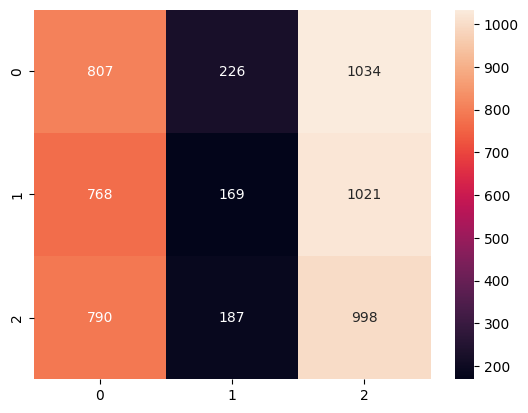

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# Matriz de Confusión: Interpretación y Análisis

## 1. ¿Qué es una matriz de confusión?
Herramienta para evaluar el rendimiento de un modelo de clasificación. Muestra:
- **Aciertos**: Predicciones correctas.
- **Errores**: Predicciones incorrectas (falsos positivos/negativos).

---

## 2. Estructura de la Matriz
| Componente               | Descripción                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| **Eje Y (vertical)**     | Valores reales (clases verdaderas).                                         |
| **Eje X (horizontal)**   | Predicciones del modelo.                                                    |
| **Diagonal principal**   | Aciertos (ej: celda `[0,0]` = predicciones correctas de la clase "0").      |
| **Fuera de la diagonal** | Errores (ej: celda `[0,1]` = clase real "0" predicha como "1").             |

---

## 3. Interpretación del Mapa de Calor
- **Colores**:  
  - **Oscuros (ej: morado)**: Valores bajos (pocos casos).  
  - **Claros (ej: naranja)**: Valores altos (muchos casos).  

---

## 4. Ejemplo Analizado (Clases 0, 1, 2)
### Resultados Clave:
| Clase Real | Predicción Correcta | Errores Notables         |
|------------|---------------------|--------------------------|
| **0**      | 807                 | 226 → "1", 1034 → "2"    |
| **1**      | 169                 | Bajo acierto             |
| **2**      | 998                 | Alto rendimiento         |

### Hallazgos:
- **Fortalezas**:  
  - Clase "2" tiene el mejor desempeño (998 aciertos).  
- **Debilidades**:  
  - Clase "1" tiene baja precisión (solo 169 aciertos).  
  - Clase "0" se confunde frecuentemente con "2" (1034 errores).  

---

## 5. Acciones Recomendadas
1. **Mejorar Clase "1"**:
   - Aumentar datos de entrenamiento para esta clase.
   - Revisar características relevantes.
2. **Reducir Confusión "0" vs "2"**:
   - Analizar similitudes entre ambas clases.
3. **Calcular Métricas**:
   - Precisión, recall y F1-score por clase.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    internal       0.34      0.39      0.36      2067
 non-payment       0.29      0.09      0.13      1958
    payments       0.33      0.51      0.40      1975

    accuracy                           0.33      6000
   macro avg       0.32      0.33      0.30      6000
weighted avg       0.32      0.33      0.30      6000



# **Como interpretar los resultados del algoritmo**

[Detalles para entender a profundidad mejor los resultados](https://www.nb-data.com/p/breaking-down-the-classification)

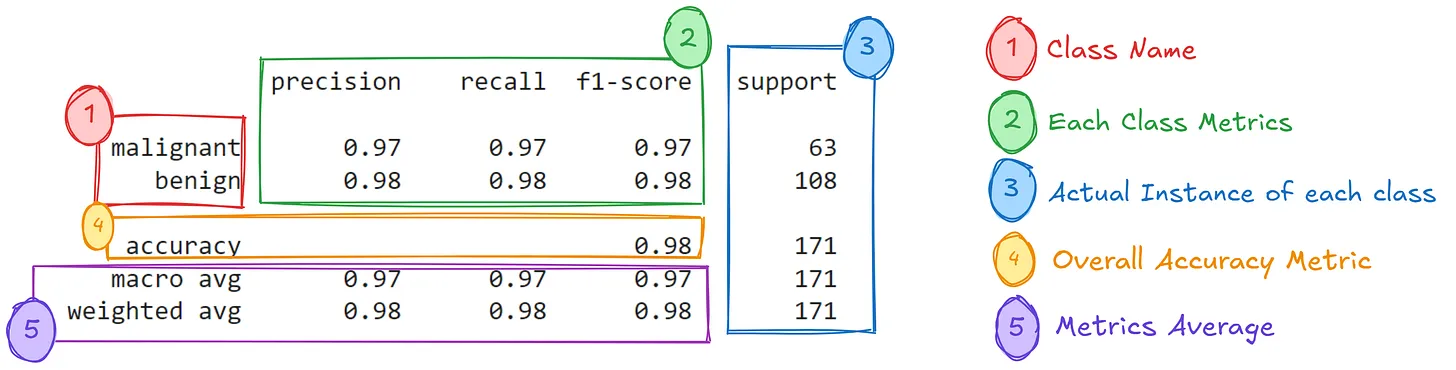

**¿Qué es GridSearchCV?**

GridSearchCV es el proceso de ajuste de hiperparámetros para determinar los valores óptimos de un modelo dado.

In [ ]:
from sklearn.model_selection import GridSearchCV
parametros = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), parametros, cv=5)
grid.fit(X_train, y_train)
mejor_modelo = grid.best_estimator_

# Visualizacion del algoritmo

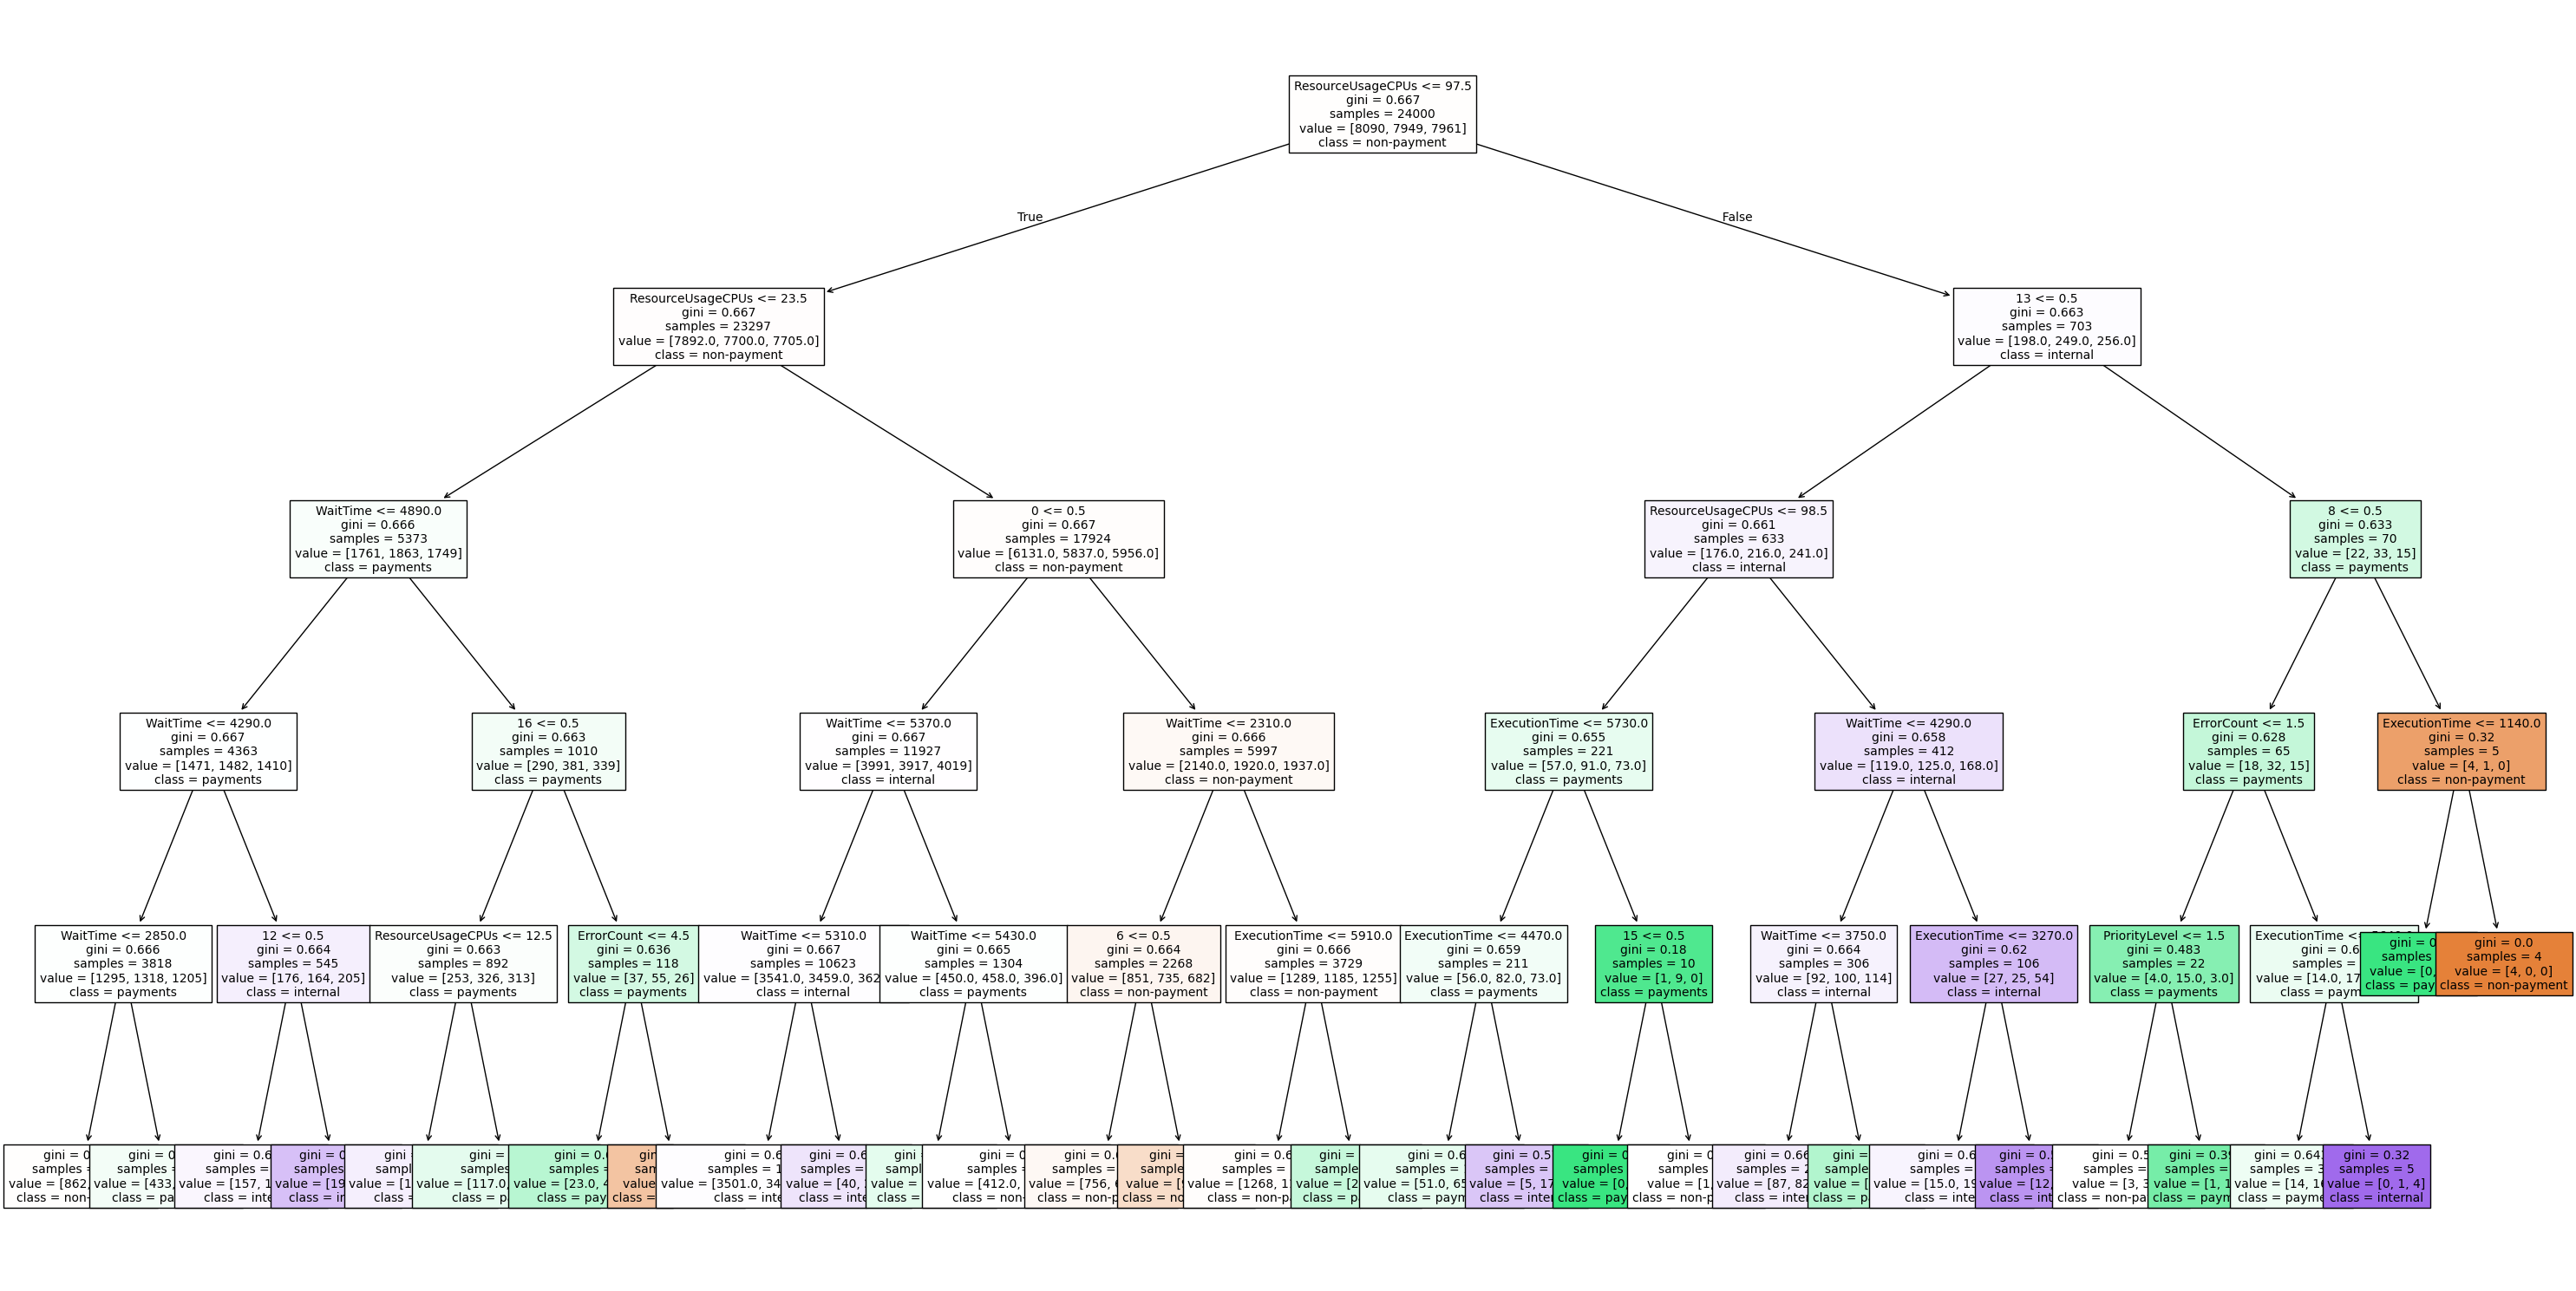

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Aumentar el tamaño de la figura
plt.figure(figsize=(30, 15))  # Tamaño aún más grande

# Guardar en formato SVG para mejor zoom
plot_tree(mejor_modelo, feature_names=X.columns, class_names=y.unique(), filled=True,
          fontsize=10)  # Ajustar tamaño de fuente según necesites

# Mostrar la figura
plt.tight_layout()  # Para mejor distribución del espacio
plt.show()

# Guardar como archivo SVG para zoom de alta calidad
plt.savefig('arbol_decision.svg', format='svg', bbox_inches='tight')

# Opcionalmente también guardar como PNG de alta resolución
plt.savefig('arbol_decision.png', format='png', dpi=300, bbox_inches='tight')

# Resumen: Análisis de Árbol de Decisión para Clasificación de Pagos

## **Descripción General**  
Modelo de clasificación que predice categorías:  
- **"payment"** (pago)  
- **"non-payment"** (no pago)  
- **"internal"** (interno)  

---

## **Hallazgos Clave**  
### 1. **Variables Determinantes**  
| Variable             | Rol en el Modelo                             | Umbral Crítico       |  
|----------------------|----------------------------------------------|----------------------|  
| `ResourceUsageCPUs`  | **Raíz del árbol** (factor principal)        | <= 97.5% → Pago      |  
| `WaitTime`           | Divisor secundario (tiempos de espera)       | 4290.0, 4900.0       |  
| `ExecutionTime`      | Influencia en ramas intermedias              | 5370.0               |  
| `ErrorCount`         | Impacto en decisiones finales                | < 3.5 o 4.5          |  

### 2. **Estructura del Árbol**  
- **Primer split**:  
  - Si `ResourceUsageCPUs > 97.5%` → Alta probabilidad de **no pago**.  
  - Si `ResourceUsageCPUs <= 97.5%` → Subdivide según `WaitTime` y `ExecutionTime`.  
- **Nodos críticos**:  
  - Uso alto de CPU (>97.5%) correlaciona con **no pago**.  
  - Tiempos de espera (`WaitTime`) prolongados aumentan riesgo de no pago.  

### 3. **Métricas Técnicas**  
| Métrica    | Descripción                                  | Observación          |  
|------------|----------------------------------------------|----------------------|  
| `gini`     | Mide impureza (0 = perfecta separación)      | Menor en nodos profundos |  
| `samples`  | Número de casos en cada nodo                 | Nodo raíz: 100% datos|  
| `value`    | Distribución de clases (ej: [50,30,20])      | Clase dominante por nodo |  

---

## **Recomendaciones de Acción**  
### 1. **Optimización Operacional**  
- **Gestión de CPU**:  
  - Mantener uso <97.5% (alertas automáticas al superar 90%).  
  - Escalar recursos en picos de demanda.  
- **Reducción de WaitTime**:  
  - Automatizar procesos que causan demoras >4290 unidades.  
  - Priorizar transacciones con `WaitTime` cercano a 4900.  

### 2. **Prevención de No Pagos**  
- **Control de Errores**:  
  - Limitar `ErrorCount` a <3.5 por transacción.  
  - Implementar revisión manual si `ErrorCount > 4.5`.  
- **Segmentación Proactiva**:  
  - Identificar clientes con `ResourceUsageCPUs > 97.5%` + `WaitTime > 4900` como **riesgo alto**.  

### 3. **Mejora Continua**  
- **Análisis de "internal"**:  
  - Estudiar por qué algunas transacciones se clasifican como internas y su relación con pagos.  
- **Validación del Modelo**:  
  - Calcular precisión, recall y F1-score por clase.  
  - Realizar validación cruzada para confirmar robustez.  

---

## **Pasos Siguientes**  
1. Implementar sistema de monitoreo en tiempo real con umbrales clave.  
2. Generar reportes semanales de transacciones en zonas de riesgo (`CPU > 97.5%`, `WaitTime > 4900`).  
3. A/B testing para optimizar procesos críticos identificados.  
